Here we look at how the relative difference between the computed and the original gradient and y-intercet varies as the number of points changes from 1 to 100.

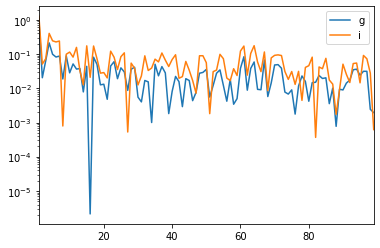

In [1]:
%matplotlib inline

import numpy as np
from pandas import DataFrame
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(42)

x_scale = 10
gradient = 2
y_intercept = -5

gradients = []
y_intercepts = []
num_points = list(range(1, 100))

for number_of_points in num_points:
    x = x_scale * rng.rand(number_of_points)
    y = gradient * x + y_intercept + rng.normal(size=number_of_points)
    data = DataFrame({"x": x, "y": y})

    model = LinearRegression(fit_intercept=True)
    model.fit(data[["x"]], data["y"])

    gradients.append(abs((model.coef_[0] - gradient) / gradient))
    y_intercepts.append(abs((model.intercept_ - y_intercept) / y_intercept))

DataFrame({"g": gradients, "i": y_intercepts}, index=num_points).plot(logy=True)